In [ ]:
!pip sklearn

ERROR: unknown command "sklearn" - maybe you meant "search"


In [ ]:
# import module
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data
loan_data=pd.read_csv('/content/loan_data.csv',index_col=None)


In [ ]:
# Changing the column names

loan_data.columns=[c.replace('.',"_") for c in loan_data.columns]
print('No. of rows/records: {}'.format(loan_data.shape[0]))
print('No. of columns/variables: {}'.format(loan_data.shape[1]))

loan_data.head()

No. of rows/records: 9578
No. of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
var_dict=pd.DataFrame({'Variable':['credit_policy','purpose','int_rate','installment','log_annual_inc','dti','fico','days_with_cr_line','revol_bal','revol_util','ing_last_6mnths','delinq_2yrs','pub_rec','not_fully_paid'],
                       'Explanation':['1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise','The purpose of the loan','The interest rate of the loan','The monthly installments owed by the borrower if the loan is funded','The natural log of the self-reported annual income of the borrower','The debt-to-income ratio of the borrower (amount of debt divided by annual income)','The FICO credit score of the borrower',"The number of days the borrower has had a credit line","The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)","The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available","The borrower's number of inquiries by creditors in the last 6 months","The number of times the borrower had been 30+ days past due on a payment in the past 2 years","The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)",'indicates  whether  the  loan  was  not  paid  back  in  full  (the  borrowereither defaulted or the borrower was deemed unlikely to pay it back)']})
var_dict.head(14)

,Variable,Explanation
0,credit_policy,1 if the customer meets the credit underwritin...
1,purpose,The purpose of the loan
2,int_rate,The interest rate of the loan
3,installment,The monthly installments owed by the borrower ...
4,log_annual_inc,The natural log of the self-reported annual in...
5,dti,The debt-to-income ratio of the borrower (amou...
6,fico,The FICO credit score of the borrower
7,days_with_cr_line,The number of days the borrower has had a cred...
8,revol_bal,The borrower's revolving balance (amount unpai...
9,revol_util,The borrower's revolving line utilization rate...


In [ ]:
# Understand the variables

variables=pd.DataFrame(columns=['Variable','No of unique values','No of null values','Values'])

for i, var in enumerate(loan_data.columns):
  variables.loc[i]=[var,loan_data[var].nunique(),loan_data[var].isnull().sum(),loan_data[var].unique().tolist()]

# Join with the variables dataframe
variables.merge(var_dict,on='Variable').set_index('Variable')

,No of unique values,No of null values,Values,Explanation
Variable,,,,
credit_policy,2,0,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,0,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan
int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan
installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower
days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


Featrures

In [ ]:
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico", "days_with_cr_line", "revol_bal", "revol_util", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
BINARY = ["credit_policy","not_fully_paid"]
CATEGORICAL = ["purpose"]
LOAN = ["int_rate", "installment", "days_with_cr_line", "revol_bal", "revol_util"]
PERSON = ["log_annual_inc", "dti", "fico", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
TARGET = ["not_fully_paid"]

#also change the type for TARGET to categorical
loan_data[CATEGORICAL ] = loan_data[CATEGORICAL ].astype('category')

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit_policy      9578 non-null   int64   
 1   purpose            9578 non-null   category
 2   int_rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log_annual_inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days_with_cr_line  9578 non-null   float64 
 8   revol_bal          9578 non-null   int64   
 9   revol_util         9578 non-null   float64 
 10  inq_last_6mths     9578 non-null   int64   
 11  delinq_2yrs        9578 non-null   int64   
 12  pub_rec            9578 non-null   int64   
 13  not_fully_paid     9578 non-null   int64   
dtypes: category(1), float64(6), int64(7)
memory usage: 982.6 KB


**MISSING VALUES & IMPUTATION**

Missing values might create errors in the analysis. From the table above, we can see that there are no missing values, so we can skip the imputation step :)

**OUTLIERS**

Outliers might skew aggregations and create bias in the training model. The dataset does not have many features (columns) so we can check the min & max of each feature and locate outliers. For example, for the binary features we expect values of 0 minimum and 1 maximum.

In [ ]:
loan_data[BINARY].agg(['min','max'])

,credit_policy,not_fully_paid
min,0,0
max,1,1


In [ ]:
loan_data[NUMERIC].agg(['min','max'])

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
min,0.0600,15.67,7.547502,0.00,612,178.958333,0,0.0,0,0,0
max,0.2164,940.14,14.528354,29.96,827,17639.958330,1207359,119.0,33,13,5


The ranges of each feature seem to be within the expected ranges, except for revol_bal: this range is from 0 to 1.2 milions! Let's examine this feature in more detail by visually showing its distribution with a boxplot:

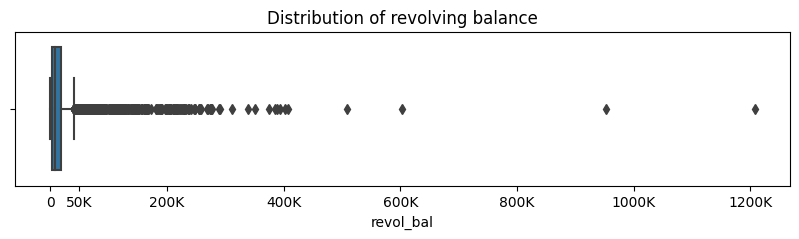

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(x='revol_bal',data=loan_data)
plt.xticks(ticks=[0,50000,200000,400000,600000,800000,1000000,1200000], labels=['0','50K','200K','400K','600K','800K','1000K','1200K'])
plt.title("Distribution of revolving balance")
plt.show()

OK, the boxplot shows that the majority of the values are certainly below 50,000 with several outliers from 50,000 to 500,000; there are also 4 extreme points above 500,000! There four points might be due to error or they might be real extreme cases. Whatever the case, they would introduce bias to further analysis and model-training. Since there are more than 9500 entries in total, we can drop these extreme four without loosing much information and explanatory power.

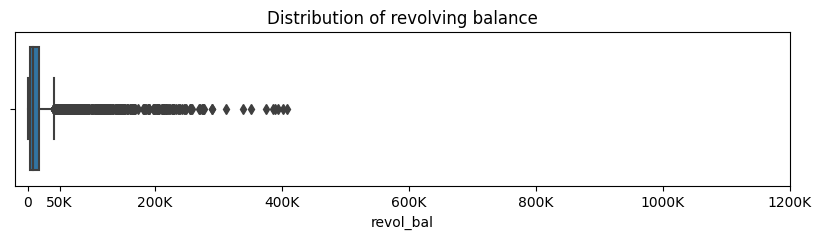

In [ ]:
# get the indices of the extreme outliers and drop them
indices=loan_data[loan_data['revol_bal']>500000].index
loan_data_clean=loan_data.drop(indices)
# check the boxplot again:
plt.figure(figsize=(10,2))
sns.boxplot(x='revol_bal',data=loan_data_clean)
plt.xticks(ticks=[0,50000,200000,400000,600000,800000,1000000,1200000], labels=['0','50K','200K','400K','600K','800K','1000K','1200K'])
plt.title("Distribution of revolving balance")
plt.show()


**The nature of loans**

Let's examine the loans by various variables and gain insights. First, let's see the purpose of the loans in detail:



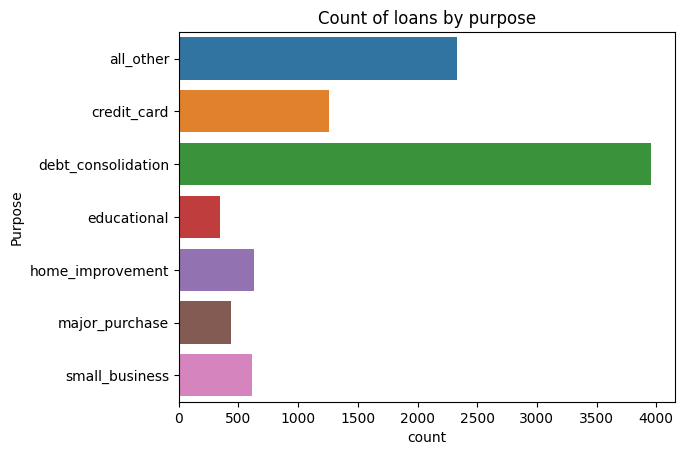

In [ ]:
#To gain some insights, we can visualize what kind of loans people get:
sns.countplot(y='purpose',data=loan_data_clean)
plt.ylabel('Purpose')
plt.title("Count of loans by purpose")
plt.show()

The visual shows that most loans are issued for debt consollidation and for purposes grouped together in "all_other" category. The least number of loans are educational and for major purchases. Now, let's see how many of these loans are not fully paid back:

Text(0.5, 0, '')

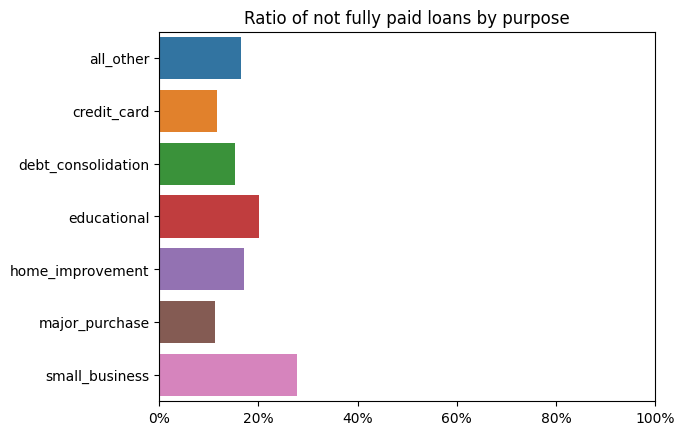

In [ ]:
#convert not_fully_paid to int for convenience, to calc the mean
ax = sns.barplot( y=loan_data_clean.purpose, x=loan_data_clean.not_fully_paid.astype('int'), ci=None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.title("Ratio of not fully paid loans by purpose")
plt.xlim(0,1)
plt.ylabel(None)
plt.xlabel(None)

The purpose of a loan is related to whether it is fully paid back or not: Loans for small_business and education have the higher ratio of not being paid back (27% and 20%), while major purchases and credit card funding are less risky.

(0.0, 1.0)

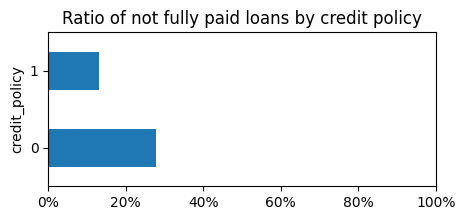

In [ ]:
ratio=loan_data_clean.groupby('credit_policy')['not_fully_paid'].mean()
ax=ratio.plot.barh(figsize=(5,2),title='Ratio of not fully paid loans by credit policy')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
plt.xlim(0,1)

Nice, looks like only 13% of people that meet the credit criteria do not pay back their loans, while the percentage is doubled to 28% for those that do not meet the criteria.

Let's examine some of the other features in relation to whether a loan was fully paid back or not. Since we ultimately are interested in predicting the probability of not fully paying back loans, we should only consider the features that are available at the time of issuing a loan:

int_rate,
installment,
log_annual_inc,
dti,
fico.

In [ ]:
# function to plot visuals about the distribution of a feature by various categories of interest

def show_distribution(feature='int_rate', name="Interest Rate"):
    # define the subplot areas
    fig, axes = plt.subplots(1,3, figsize=(15,3))

    # plot the boxplots by purpose
    sns.boxplot(data=loan_data_clean, x=feature, y='purpose', ax=axes[0], )
    axes[0].set_ylabel("")
    axes[0].set_xlabel(name)
    axes[0].set_title(name+" by loan purpose")
    # plot the boxplots by not_fully_paid
    y = loan_data_clean.not_fully_paid.astype('category')
    sns.boxplot(data=loan_data_clean, x=feature, y=y, ax=axes[1])
    axes[1].set_ylabel("not fully paid")
    axes[1].set_xlabel(name)
    axes[1].set_title(name+" by paid status")
    # plot the feature distribution
    sns.histplot(x=loan_data_clean[feature], cumulative=False, ax=axes[2])
    #axes[2].set_ylabel("not fully paid")
    axes[2].set_xlabel(name)
    axes[2].set_title("Distribution of "+name)

int_rate, Interest Rate

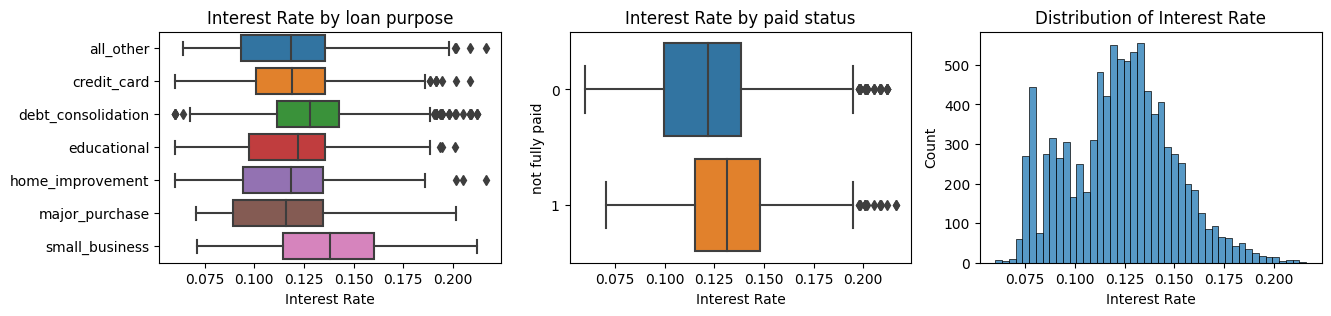

In [ ]:
show_distribution(feature='int_rate',name='Interest Rate')

The first graph shows that the purpose of a loan does not affect its interest rate much, since we see the boxes at the same place for each purpose. There is one exception though: loans for small businesses tend to have higher interest rates than the rest; their average is higher than the 75th prcentile (the right edge of the box) of other purposes. This means that 75% of the loans for other purposes have lower interest rates than the average interest rate for small business loans.

The second graph shows that the loans that were not fully paid back have slightly higher interest rates, but not by a significant amount. In the third graph we see that the interest rates tend to follow a normal distribution with a lot of extra loans having rates lower than the average, skewing the distribution to the left a bit.

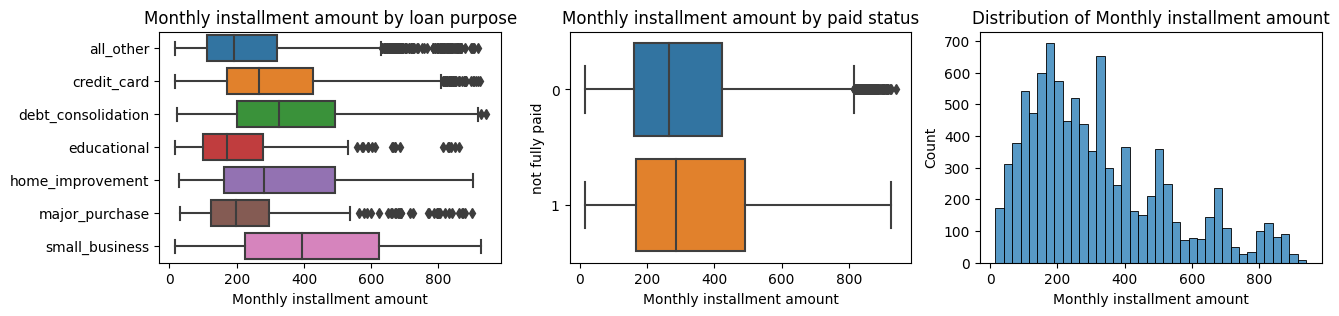

In [ ]:
show_distribution('installment', "Monthly installment amount")

We can see that the installment amount changes related to the pupose of the loan, with loans for small businesses, debt consolidation & home improvement having the highest range of installements. The installment amount does not seem to have any relation to paying back loans, the differences there are negligible. The distribution of installments amount shows that most loans have lower installments, below $400.



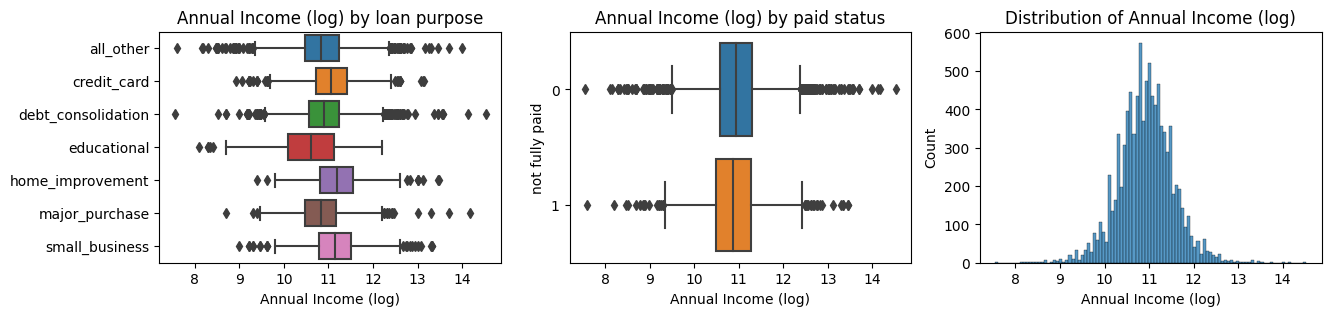

In [ ]:
show_distribution('log_annual_inc', "Annual Income (log)")

There is nothing to observe here, the feature is normally distributed as expected.

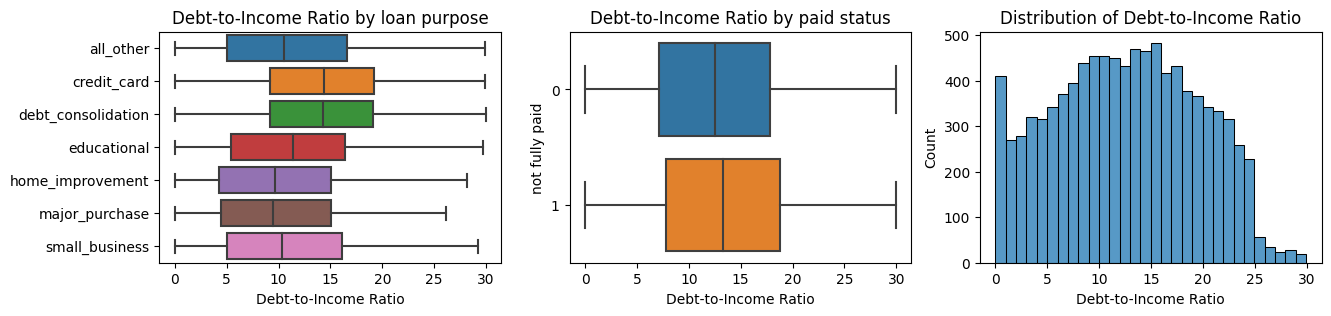

In [ ]:
show_distribution('dti','Debt-to-Income Ratio')

It looks like people with higher debt-to-income ratios, i.e. those that have larger debts, tend to get loans for debt consolidation and credit card funding. The dti does not seem to greatly affect whether a loan is fully paid back or not. The distribution shows that a lot of loans are taken by people with 0 dti or dti in the lower range, and very few people with dti higher than 25.

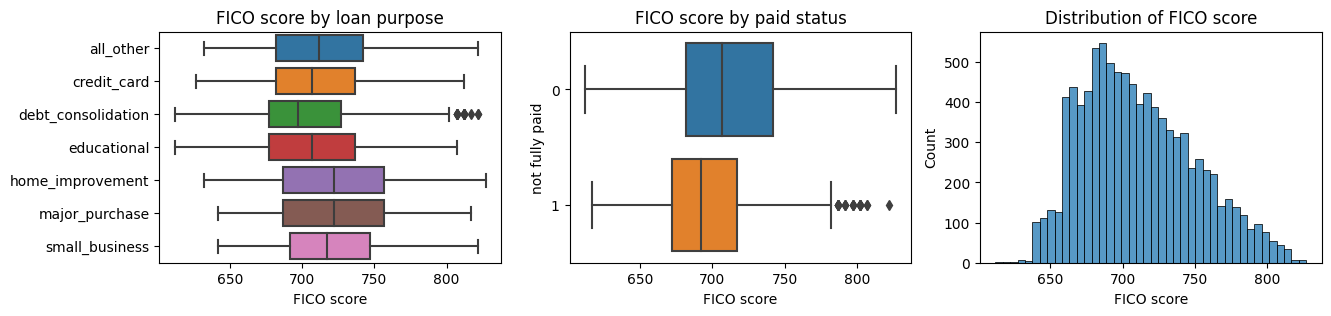

In [ ]:
show_distribution('fico', "FICO score")

There is nothing special to note regarding FICO by loan purpose, but it seems like people paying back their loans have higher FICO scores, i.e. more creditworthiness; this might be a good indicator to predict if a loan will be fully paid back. For FICO scores greater than 700, the amount of people having higher scores gradually decreases.

**Conclusions of exploratory analysis**

So, here are the insights & conclusions drawn so far:

people that do not meet credit criteria are more prone to not pay back a loan

the purpose of a loan is related to paid-back status

loans for small businesses tend to have higher interest rates

loans for small businesses and debt consolidation have the highest installements

small business loans have $120 higher installments than other loans, on average

log of income does not relate to fully-paid status

dti does not greatly relate to fully-paid status

higher FICO scores indicate fully-paid back loans










# **Analysis: Predict the probability a user will be able to pay back their loan**

CORRELATION

<Axes: >

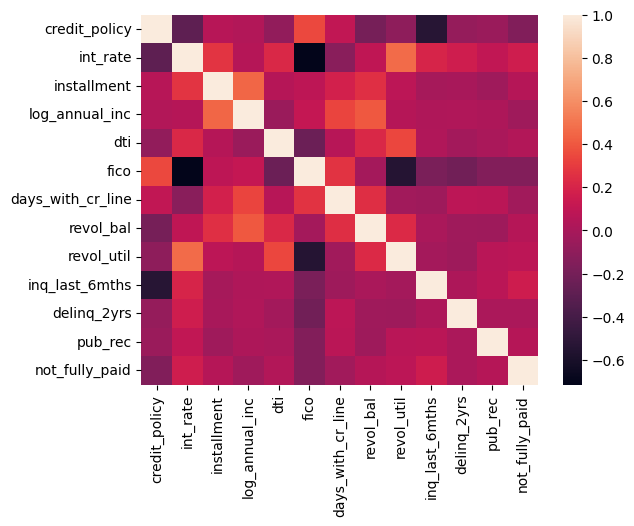

In [ ]:
sns.heatmap(loan_data_clean.corr(numeric_only = True))


In [ ]:
# show the ratios of target feature:
loan_data_clean.not_fully_paid.value_counts(normalize=True).round(2)

0    0.84
1    0.16
Name: not_fully_paid, dtype: float64

In [ ]:
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico", "days_with_cr_line", "revol_bal", "revol_util", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
TARGET = ["not_fully_paid"]
CATEGORICAL = ["purpose"]

#add features
loan_data_model = loan_data_clean[NUMERIC+CATEGORICAL]
# convert categoricals
loan_data_model = pd.get_dummies(loan_data_model, columns=CATEGORICAL, drop_first=False)
X=loan_data_model
y=loan_data_clean[TARGET]

In [ ]:
# split the set to train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=41)

In [ ]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

# **Evaluation of models**

We need to show how good a model is. For imbalanced sets, accuracy is not a good metric: consider a model that always predicts "class 0" (fully paid loan); in our case, this model will be correct 85% of the time, i.e. it would have a high accuracy of 85%, although it would miss all possible not fully paid loans, which is our objective. The standard score to use for imbalanced sets is roc_auc. Additionally recall & f1 score will be used, with accuracy for reference. Recall is the model's ability to not miss positives, while F1 score is the balance between recall & precision.

In [ ]:
# a helper function to show the scores in a table and visual for easy comparison
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, f1_score, precision_score

def show_scores(models, X_train, y_train, X_test, y_test):

    scores = []

    for m in models:
        y_pred_train = m.predict(X_train)
        y_pred_test  = m.predict(X_test)
        y_pred_proba_train = m.predict_proba(X_train)
        y_pred_proba_test  = m.predict_proba(X_test)
        name = f"{m}".split("(")[0]
        #scores.append([name, 'cohen', 'train', cohen_kappa_score(y_train, y_pred_train)])
        #scores.append([name, 'cohen', 'test', cohen_kappa_score(y_test, y_pred_test)])
        scores.append([name, 'roc_auc', 'train', roc_auc_score(y_train, y_pred_proba_train[:,1])])
        scores.append([name, 'roc_auc', 'test', roc_auc_score(y_test, y_pred_proba_test[:,1])])
        scores.append([name, 'recall', 'train', recall_score(y_train, y_pred_train)])
        scores.append([name, 'recall', 'test', recall_score(y_test, y_pred_test)])
        scores.append([name, 'f1', 'train', f1_score(y_train, y_pred_train)])
        scores.append([name, 'f1', 'test', f1_score(y_test, y_pred_test)])
        scores.append([name, 'accuracy', 'train', accuracy_score(y_train, y_pred_train)])
        scores.append([name, 'accuracy', 'test', accuracy_score(y_test, y_pred_test)])

    scores_df =  pd.DataFrame(scores,columns=['model_name','metric','set','score'])
    #sns.catplot(data=scores_df, y='model_name', x='score',col='metric', hue='set', kind='bar',)#palette=['blue','orange'] )
    sns.catplot(data=scores_df.query("set == 'test'"), y='model_name', x='score',col='metric', kind='bar',)#palette=['blue','orange'] )
    display(scores_df.pivot(index='model_name', columns=['metric','set'], values='score').round(2))

    return scores_df

metric                 roc_auc       recall          f1       accuracy      
set                      train  test  train  test train  test    train  test
model_name                                                                  
DecisionTreeClassifier    1.00  0.52   1.00  0.19  1.00  0.20     1.00  0.75
LogisticRegression        0.64  0.63   0.54  0.54  0.31  0.32     0.64  0.63
RandomForestClassifier    1.00  0.64   1.00  0.00  1.00  0.01     1.00  0.84

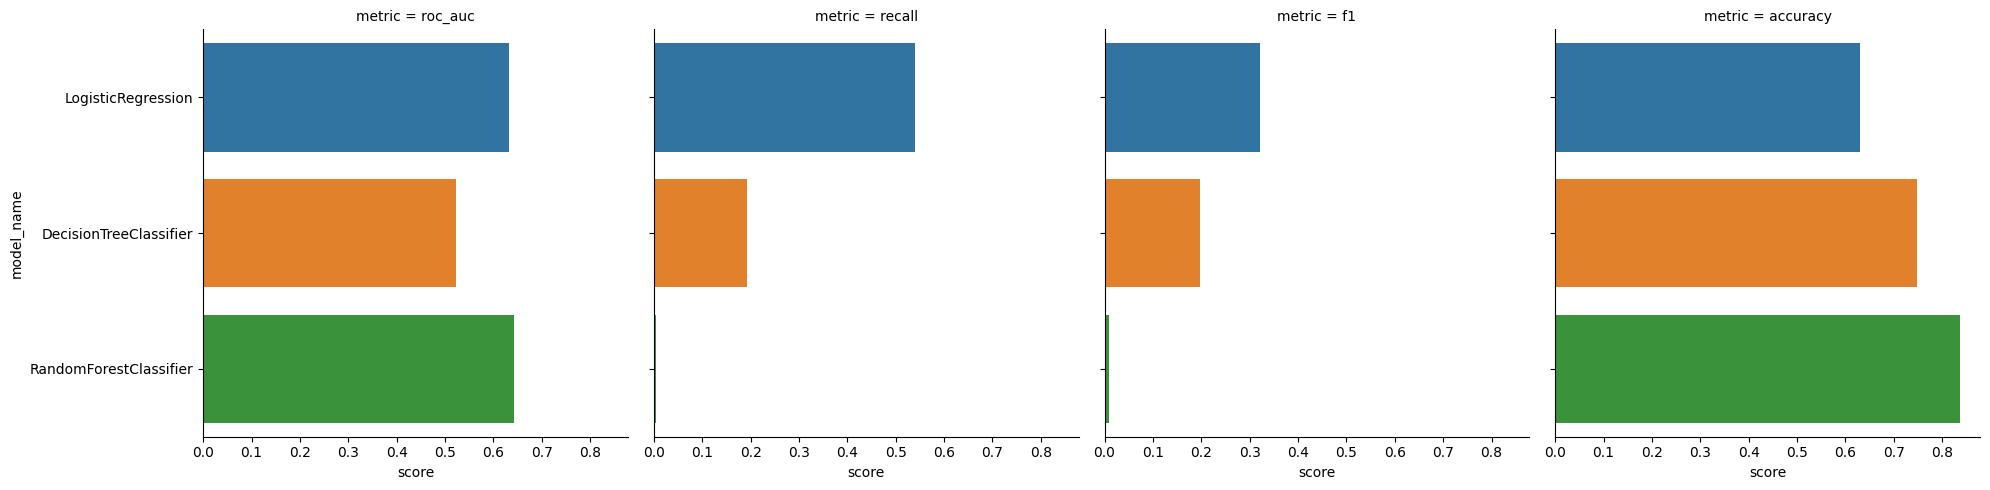

In [ ]:
scores = show_scores([lr, dt,rf], X_train, y_train, X_test, y_test)
# gather the scores in a dataframe for later
scores = scores.rename({"score":"naive"},axis=1)